In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB , BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
SMS_data=pd.read_csv("spam.csv",encoding='latin-1')
print(SMS_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
SMS_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
SMS_data = SMS_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
SMS_data = SMS_data.rename(columns={'v1':'Target','v2':'Text'})
SMS_data     

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
encoder=LabelEncoder()
SMS_data['Target']=encoder.fit_transform(SMS_data['Target'])
SMS_data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
SMS_data.duplicated().sum()

403

In [8]:
SMS_data = SMS_data.drop_duplicates()

In [9]:
SMS_data.shape

(5169, 2)

In [10]:
SMS_data.describe()

,Target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jupyter-711122243030/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
text_data = SMS_data['Text']
SMS_data['no.of_characters'] = text_data.apply(lambda x: len(x))
SMS_data['no.of_sentences'] = text_data.apply(lambda x: len(sent_tokenize(x)))
SMS_data['no.of_words'] = text_data.apply(lambda x: len(word_tokenize(x)))

/tmp/ipykernel_15384/1570509792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMS_data['no.of_characters'] = text_data.apply(lambda x: len(x))
/tmp/ipykernel_15384/1570509792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMS_data['no.of_sentences'] = text_data.apply(lambda x: len(sent_tokenize(x)))
/tmp/ipykernel_15384/1570509792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [13]:
SMS_data

,Target,Text,no.of_characters,no.of_sentences,no.of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4,35
5568,0,Will Ì_ b going to esplanade fr home?,37,1,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,2,15
5570,0,The guy did some bitching but I acted like i'd...,125,1,27


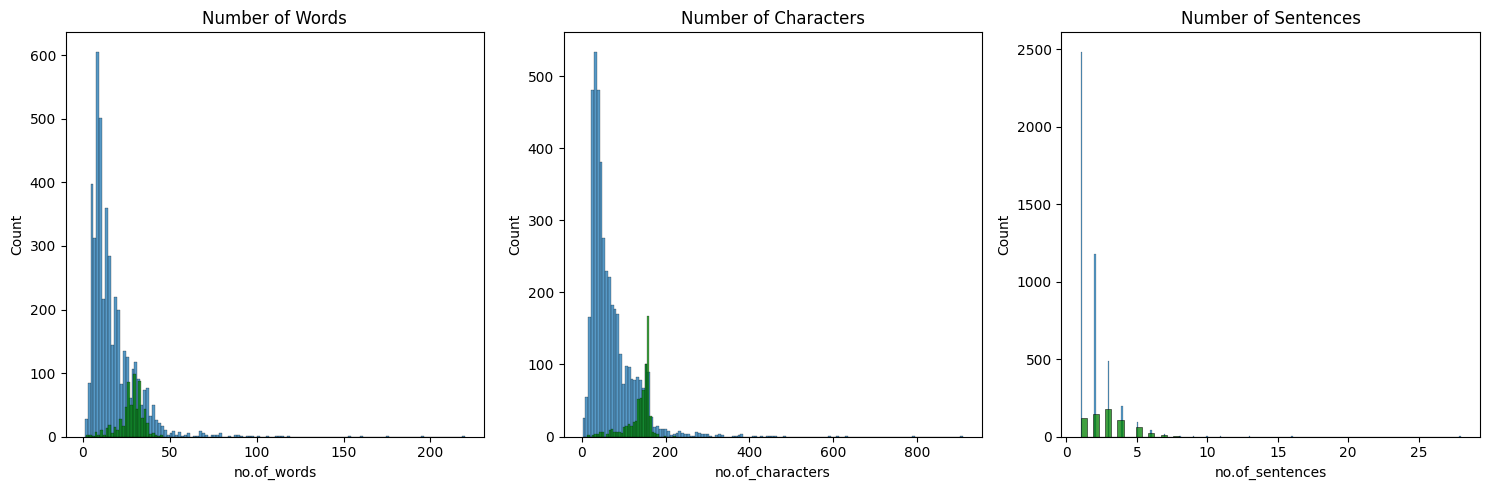

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(SMS_data[SMS_data['Target']==0]['no.of_words'])
sns.histplot(SMS_data[SMS_data['Target']==1]['no.of_words'],color='green')
plt.title('Number of Words')
plt.subplot(1, 3, 2)
sns.histplot(SMS_data[SMS_data['Target']==0]['no.of_characters'])
sns.histplot(SMS_data[SMS_data['Target']==1]['no.of_characters'],color='green')
plt.title('Number of Characters')
plt.subplot(1, 3, 3)
sns.histplot(SMS_data[SMS_data['Target']==0]['no.of_sentences'])
sns.histplot(SMS_data[SMS_data['Target']==1]['no.of_sentences'],color='green')
plt.title('Number of Sentences')
plt.tight_layout()
plt.show()

/tmp/ipykernel_15384/99762258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(SMS_data.corr(),annot=True)


<AxesSubplot: >

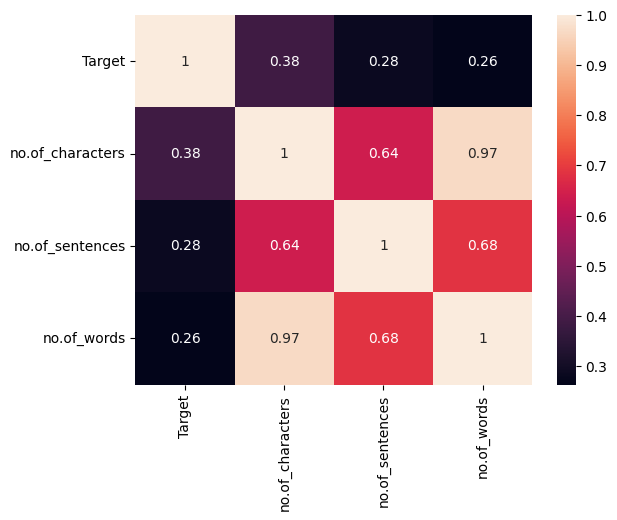

In [15]:
sns.heatmap(SMS_data.corr(),annot=True)

In [16]:
text_data=SMS_data['Text']
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocessingthetext(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ''.join([char for char in text if not char.isdigit()])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text
SMS_data['processed_text'] = text_data.apply(preprocessingthetext)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter-711122243030/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_15384/3242449859.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMS_data['processed_text'] = text_data.apply(preprocessingthetext)


In [17]:
print(SMS_data[['Text', 'processed_text']])

                                                   Text  \
0     Go until jurong point, crazy.. Available only ...   
1                         Ok lar... Joking wif u oni...   
2     Free entry in 2 a wkly comp to win FA Cup fina...   
3     U dun say so early hor... U c already then say...   
4     Nah I don't think he goes to usf, he lives aro...   
...                                                 ...   
5567  This is the 2nd time we have tried 2 contact u...   
5568              Will Ì_ b going to esplanade fr home?   
5569  Pity, * was in mood for that. So...any other s...   
5570  The guy did some bitching but I acted like i'd...   
5571                         Rofl. Its true to its name   

                                         processed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri wkli comp win fa cup final tkt st m...  
3                   u dun say earli hor u c alreadi say  
4

In [18]:
SMS_data.head() 

,Target,Text,no.of_characters,no.of_sentences,no.of_words,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah dont think goe usf live around though


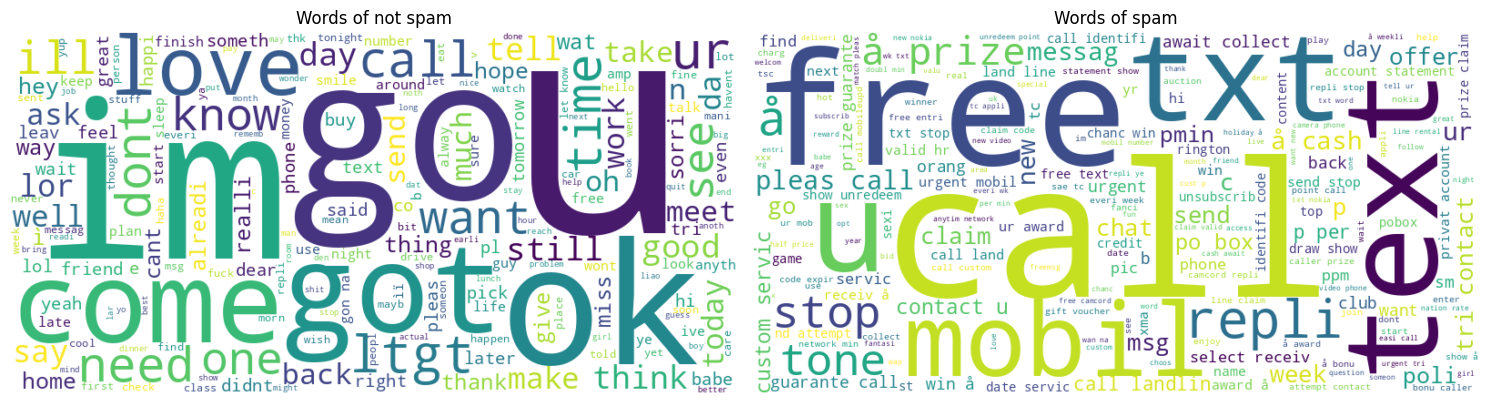

In [19]:
NOT_SPAM = SMS_data[SMS_data['Target'] == 0]['processed_text'].str.cat(sep=' ')
SPAM = SMS_data[SMS_data['Target'] == 1]['processed_text'].str.cat(sep=' ')
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(NOT_SPAM)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(SPAM)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Words of not spam')
plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Words of spam')
plt.tight_layout()
plt.show()

In [20]:
spam_corpus=[]
for msg in SMS_data[SMS_data['Target']==1]['processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [21]:
len(spam_corpus)

9447

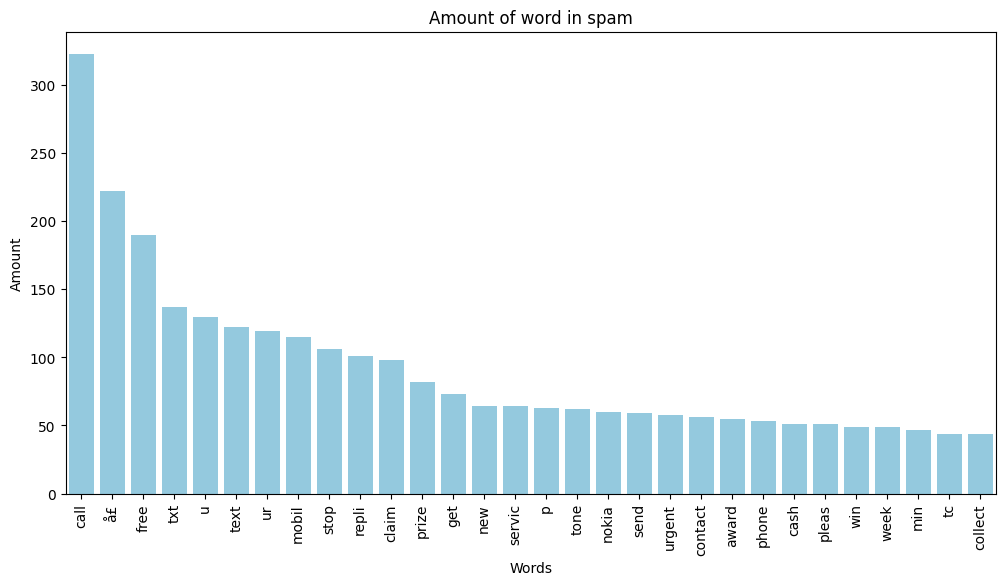

In [22]:
word_counts = Counter(spam_corpus)
word_counts_SMS_data = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts_SMS_data, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Amount')
plt.title('Amount of word in spam')
plt.xticks(rotation='vertical')
plt.show()
     

In [23]:
ham_corpus=[]
for msg in SMS_data[SMS_data['Target']==0]['processed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

36264

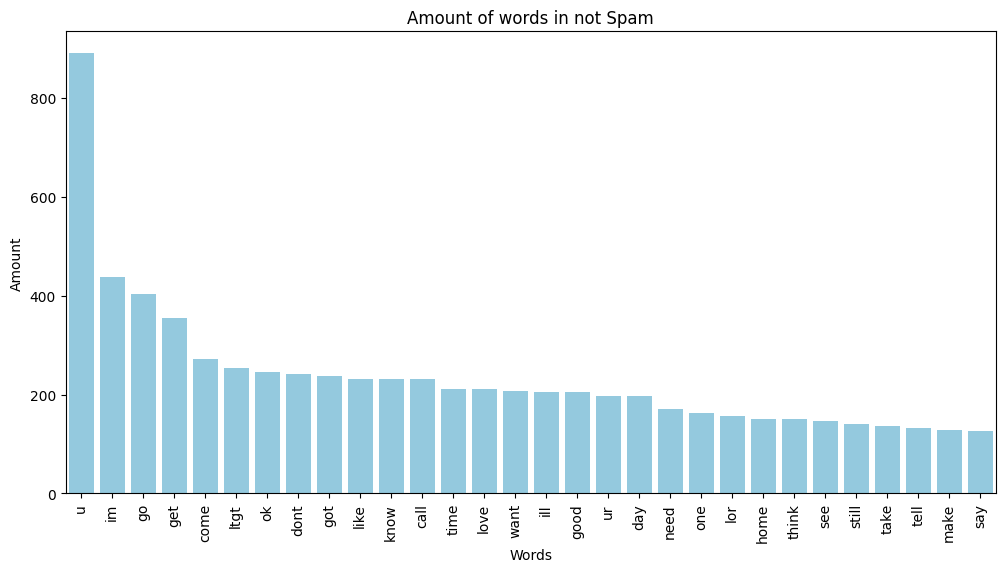

In [24]:
word_counts = Counter(ham_corpus)
word_counts_SMS_data = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts_SMS_data, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Amount')
plt.title('Amount of words in not Spam')
plt.xticks(rotation='vertical')
plt.show()
     

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfiSMS_data=TfidfVectorizer(max_features=3000)
X=tfiSMS_data.fit_transform(SMS_data['processed_text']).toarray()

In [26]:
X.shape

(5169, 3000)

In [27]:
y=SMS_data["Target"].values

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
BNB=BernoulliNB()
multiNB=MultinomialNB()
GNB=GaussianNB()

In [30]:
multiNB.fit(X_train,y_train)
y_pred1=multiNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [31]:
GNB.fit(X_train,y_train)
y_pred1=GNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))  

0.8713733075435203
0.511520737327189
[[790 106]
 [ 27 111]]


In [32]:
BNB.fit(X_train,y_train)
y_pred1=BNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9806576402321083
0.9916666666666667
[[895   1]
 [ 19 119]]


In [33]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
lr_precision = precision_score(y_test,log_pred )
print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Logistic Regression Precision: {lr_precision}")

Logistic Regression Accuracy: 0.9516441005802708
Logistic Regression Precision: 0.9680851063829787


In [34]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_pre=precision_score(y_test,nb_pred )
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes Precision:{nb_pre}")

Naive Bayes Accuracy: 0.9709864603481625
Naive Bayes Precision:1.0


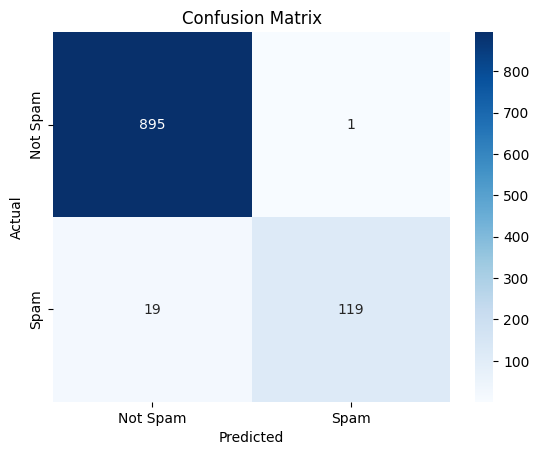

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
conf_matrix = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
class_report = classification_report(y_test, y_pred1)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

